<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/Classification_Methods_on_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GOAL**

We will want to find the most suitable classification model for this dataset.
In this dataset we have a binary class that we will target: no-recurrence-events, recurrence-events. This attribute allows us to know if patient is showing recurrence events or not. This is a binary classification problem.

**PROCESS**

We will look at application of Machine Learning algorithms on the Breast Cancer dataset from [UCI repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer)

We will apply classification methods and the [scikit-learn](https://scikit-learn.org/stable/) algorithms to process this dataset.

We will use this tutorial to understand classification https://machinelearningmastery.com/types-of-classification-in-machine-learning/ (I copied some of the code bits from this tutorial)

We will use this OneHotEncoding and Neural Network model (MultiLayer Perceptron (MLP) neural network) from this amazing tutorial https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

Some algorithms are specifically designed for binary classification and do not natively support more than two classes; examples include Logistic Regression and Support Vector Machines.

I have also tried using GLM models to understand the predictors https://www.statsmodels.org/stable/examples/notebooks/generated/glm.html


**Steps used in this colab**

1. Upload data and import libraries
2. Explore dataset and set goal of the project
3. Use LabelEncoder to convert the class values to binary
4. Use OneHotEncoder to convert the predictors to binary
5. Use algorithms for binary classification:

    Logistic Regression,
    k-Nearest Neighbors,
    LDA,
    SVM - Support Vector Machine,
    Naive Bayes

6. Use OneHotEncoding and Neural Network model (MultiLayer Perceptron (MLP) neural network) to look at the accuracy achieved
7. Use GLM model
8. Test usage of different OneHotEncoders on this dataset
9. Use Lasso LogisticRegressionCV
10. Conclusion



**Dataset Description**

Citation Request:
   This breast cancer domain was obtained from the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and 
   M. Soklic for providing the data.  Please include this citation if you plan
   to use this database.

1. Title: Breast cancer data (Michalski has used this)

2. Sources: 
   -- Matjaz Zwitter & Milan Soklic (physicians)
      Institute of Oncology 
      University Medical Center
      Ljubljana, Yugoslavia
   -- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 11 July 1988

3. Past Usage: (Several: here are some)
     -- Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). The 
        Multi-Purpose Incremental Learning System AQ15 and its Testing 
        Application to Three Medical Domains.  In Proceedings of the 
        Fifth National Conference on Artificial Intelligence, 1041-1045,
        Philadelphia, PA: Morgan Kaufmann.
        -- accuracy range: 66%-72%
     -- Clark,P. & Niblett,T. (1987). Induction in Noisy Domains.  In 
        Progress in Machine Learning (from the Proceedings of the 2nd
        European Working Session on Learning), 11-30, Bled, 
        Yugoslavia: Sigma Press.
        -- 8 test results given: 65%-72% accuracy range
     -- Tan, M., & Eshelman, L. (1988). Using weighted networks to 
        represent classification knowledge in noisy domains.  Proceedings 
        of the Fifth International Conference on Machine Learning, 121-134,
        Ann Arbor, MI.
        -- 4 systems tested: accuracy range was 68%-73.5%
    -- Cestnik,G., Konenenko,I, & Bratko,I. (1987). Assistant-86: A
       Knowledge-Elicitation Tool for Sophisticated Users.  In I.Bratko
       & N.Lavrac (Eds.) Progress in Machine Learning, 31-45, Sigma Press.
       -- Assistant-86: 78% accuracy

4. Relevant Information:
     This is one of three domains provided by the Oncology Institute
     that has repeatedly appeared in the machine learning literature.
     (See also lymphography and primary-tumor.)

     This data set includes 201 instances of one class and 85 instances of
     another class.  The instances are described by 9 attributes, some of
     which are linear and some are nominal.

5. Number of Instances: 286

6. Number of Attributes: 9 + the class attribute





**Attributes**

All input variables are categorical. Some are ordinal.

1. Class: no-recurrence-events, recurrence-events
2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
3. menopause: lt40, ge40, premeno.
4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
6. node-caps: yes, no.
7. deg-malig: 1, 2, 3.
8. breast: left, right.
9. breast-quad: left-up, left-low, right-up,	right-low, central.
10. irradiat:	yes, no.

Missing Attribute Values: (denoted by "?")
   Attribute #:  Number of instances with missing values:
   6.             8
   9.             1.

Class Distribution:
    1. no-recurrence-events: 201 instances
    2. recurrence-events: 85 instances

In [48]:
# Import the following libraries

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import matplotlib as plt
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import os
import collections
import warnings
warnings.filterwarnings("ignore")
import networkx

In [2]:
# Import sklearn and keras libraries for ML
# Some of this librarires are imported later on in the code specific block, in case you want to reproduce only that part

from sklearn.feature_extraction.text import CountVectorizer
import sklearn.linear_model as linear_module
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [5]:
# Import data
# File contains no header info

data = pd.read_csv("/content/breast-cancer.data", header=None)
print(f"Read in {len(data)} rows")
data.head()

Read in 286 rows


,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [7]:
# Name columns, make sure to use "classification" and not "class" for the first column
# Using "class" as column name will result in problems down the line, since "class" is a pythonic expression

data.columns=['classification','age','menopause','tumorsize','invnodes','nodecaps','degmalig','breast','breastquad','irradiat']

In [8]:
# Check the data

data

,classification,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [10]:
# Interpolate missing values in the data

data.interpolate()

,classification,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [12]:
# The class for the normal state is assigned the class label 0 
# The class with the abnormal state is assigned the class label 1
# We will use LabelEncoder to convert the class values to binary

# No-recurrence-events = 0
# Recurrence-events = 1

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
data['classification'] = lb.fit_transform(data['classification'])
data

,classification,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,1,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,1,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,1,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [13]:
# retrieve numpy array

df = data.values
df

array([[0, '30-39', 'premeno', ..., 'left', 'left_low', 'no'],
       [0, '40-49', 'premeno', ..., 'right', 'right_up', 'no'],
       [0, '40-49', 'premeno', ..., 'left', 'left_low', 'no'],
       ...,
       [1, '60-69', 'ge40', ..., 'right', 'left_up', 'no'],
       [1, '40-49', 'ge40', ..., 'left', 'left_low', 'no'],
       [1, '50-59', 'ge40', ..., 'left', 'left_low', 'no']], dtype=object)

In [14]:
# This will be our target (y)
# Check that it looks correct

df[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=object)

In [15]:
# This will be our predictors (X)
# Check the slice

df[:,1:]

array([['30-39', 'premeno', '30-34', ..., 'left', 'left_low', 'no'],
       ['40-49', 'premeno', '20-24', ..., 'right', 'right_up', 'no'],
       ['40-49', 'premeno', '20-24', ..., 'left', 'left_low', 'no'],
       ...,
       ['60-69', 'ge40', '20-24', ..., 'right', 'left_up', 'no'],
       ['40-49', 'ge40', '30-34', ..., 'left', 'left_low', 'no'],
       ['50-59', 'ge40', '30-34', ..., 'left', 'left_low', 'no']],
      dtype=object)

In [17]:
# Split dataset into input (X) and output (y) variables

X = df[:,1:]
y = df[:,0]

In [18]:
# Check X and y shape

print(X.shape, y.shape)

(286, 9) (286,)


Counter({0: 201, 1: 85})
['30-39' 'premeno' '30-34' '0-2' 'no' 3 'left' 'left_low' 'no'] 0
['40-49' 'premeno' '20-24' '0-2' 'no' 2 'right' 'right_up' 'no'] 0
['40-49' 'premeno' '20-24' '0-2' 'no' 2 'left' 'left_low' 'no'] 0
['60-69' 'ge40' '15-19' '0-2' 'no' 2 'right' 'left_up' 'no'] 0
['40-49' 'premeno' '0-4' '0-2' 'no' 2 'right' 'right_low' 'no'] 0
['60-69' 'ge40' '15-19' '0-2' 'no' 2 'left' 'left_low' 'no'] 0
['50-59' 'premeno' '25-29' '0-2' 'no' 2 'left' 'left_low' 'no'] 0
['60-69' 'ge40' '20-24' '0-2' 'no' 1 'left' 'left_low' 'no'] 0
['40-49' 'premeno' '50-54' '0-2' 'no' 2 'left' 'left_low' 'no'] 0
['40-49' 'premeno' '20-24' '0-2' 'no' 2 'right' 'left_up' 'no'] 0


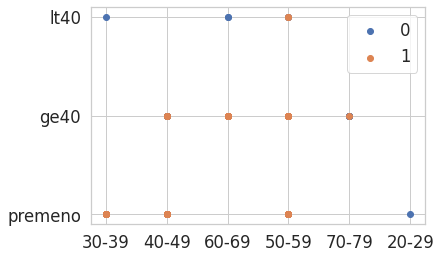

In [19]:
# Using counter to plot the data

from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot

# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(10):
	print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [21]:
# Split X and Y into training and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [22]:
# using OneHotEncoder for train (predictor) data

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train)
X_train_enc = ohe.transform(X_train)
X_test_enc = ohe.transform(X_test)
print('Train X and Test X', X_train_enc, X_test_enc)

Train X and Test X   (0, 4)	1.0
  (0, 6)	1.0
  (0, 17)	1.0
  (0, 20)	1.0
  (0, 27)	1.0
  (0, 29)	1.0
  (0, 33)	1.0
  (0, 39)	1.0
  (0, 41)	1.0
  (1, 3)	1.0
  (1, 6)	1.0
  (1, 14)	1.0
  (1, 20)	1.0
  (1, 27)	1.0
  (1, 29)	1.0
  (1, 33)	1.0
  (1, 39)	1.0
  (1, 40)	1.0
  (2, 2)	1.0
  (2, 8)	1.0
  (2, 14)	1.0
  (2, 20)	1.0
  (2, 27)	1.0
  (2, 31)	1.0
  (2, 32)	1.0
  :	:
  (211, 12)	1.0
  (211, 20)	1.0
  (211, 27)	1.0
  (211, 30)	1.0
  (211, 32)	1.0
  (211, 37)	1.0
  (211, 40)	1.0
  (212, 3)	1.0
  (212, 8)	1.0
  (212, 13)	1.0
  (212, 23)	1.0
  (212, 28)	1.0
  (212, 31)	1.0
  (212, 32)	1.0
  (212, 36)	1.0
  (212, 41)	1.0
  (213, 3)	1.0
  (213, 6)	1.0
  (213, 11)	1.0
  (213, 20)	1.0
  (213, 27)	1.0
  (213, 29)	1.0
  (213, 33)	1.0
  (213, 35)	1.0
  (213, 40)	1.0   (0, 4)	1.0
  (0, 6)	1.0
  (0, 10)	1.0
  (0, 20)	1.0
  (0, 27)	1.0
  (0, 29)	1.0
  (0, 32)	1.0
  (0, 36)	1.0
  (0, 40)	1.0
  (1, 3)	1.0
  (1, 8)	1.0
  (1, 15)	1.0
  (1, 22)	1.0
  (1, 28)	1.0
  (1, 31)	1.0
  (1, 33)	1.0
  (1, 39)	1.0
 

In [23]:
# using LabelEncoder for target (output) variable

le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
print('Train y and Test y', y_train_enc, y_test_enc)

Train y and Test y [1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0] [0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [24]:
# Logistic Regression Classification Model

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

model_L = LogisticRegression()


model_L.fit(X_train_enc, y_train_enc)

# make predictions
expected = y_test_enc
predicted = model_L.predict(X_test_enc)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm_L = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix: \n", cm_L)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.60      0.43      0.50        21

    accuracy                           0.75        72
   macro avg       0.69      0.66      0.67        72
weighted avg       0.73      0.75      0.74        72

Confusion matrix: 
 [[45  6]
 [12  9]]


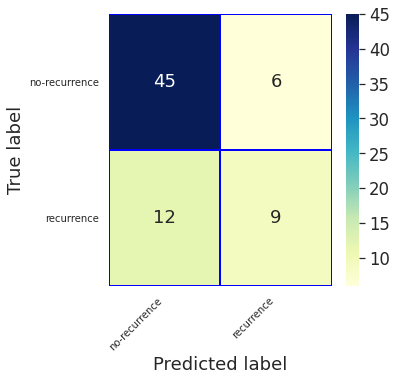

In [28]:
# Plotting Logistic Regression Classification Model Confusion Matrix

def plot_cm(cm):   
    species = ['no-recurrence', 'recurrence']
    df_cm = pd.DataFrame(cm, index=species, columns=species)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu",linecolor="blue",linewidths=1.0)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_cm(cm_L)

# In this model we get 45 True Positives and 9 True Negatives
# Based on the domain of the dataset, we will pay close attention to the bottom left quadrant
# This quadrat shows False Negatives (when event ocurred (i.e. recurrence-event), however it was predited as "non-recurenc-event")
# Why is this quadrant important? Because it is dangerous to predict "no-cancer", when the patient might have cancer.
# We can also see in the output above that recall for 1 is 0.43

# In all the models I will be looking at True postives and False Negatives (bottom left quadrant) to evaluate the model

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.60      0.43      0.50        21

    accuracy                           0.75        72
   macro avg       0.69      0.66      0.67        72
weighted avg       0.73      0.75      0.74        72

[[45  6]
 [12  9]]


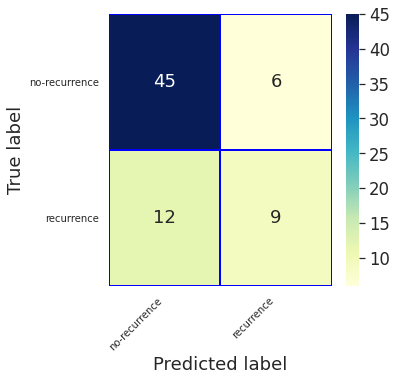

In [29]:
## Naive Bayes Classification Model

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model_L.fit(X_train_enc, y_train_enc)

# make predictions
expected = y_test_enc
predicted = model_L.predict(X_test_enc)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
plot_cm(cm)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        51
           1       0.53      0.43      0.47        21

    accuracy                           0.72        72
   macro avg       0.66      0.64      0.64        72
weighted avg       0.71      0.72      0.71        72

[[43  8]
 [12  9]]


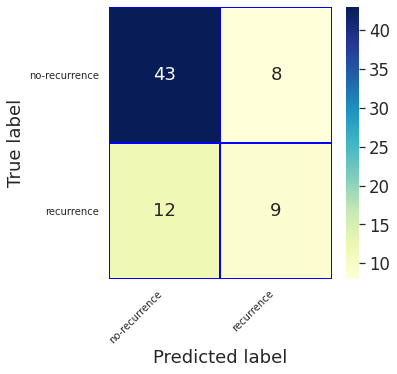

In [30]:
# LDA (Linear Descriminant Analysis) Classification Model

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, roc_auc_score, f1_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model  = LinearDiscriminantAnalysis()
model.fit(X_train_enc.toarray(), y_train_enc)

# make predictions
expected = y_test_enc
predicted = model.predict(X_test_enc)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
plot_cm(cm)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        51
           1       0.73      0.52      0.61        21

    accuracy                           0.81        72
   macro avg       0.78      0.72      0.74        72
weighted avg       0.80      0.81      0.79        72

[[47  4]
 [10 11]]


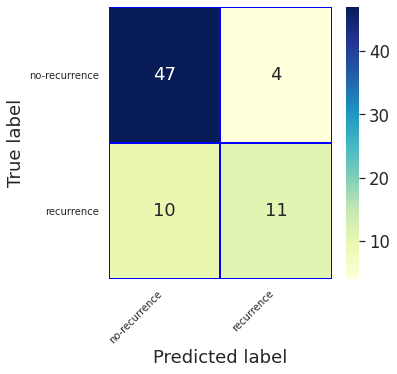

In [31]:
# Knn- classification Model
# k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_enc, y_train_enc)

# make predictions
expected = y_test_enc
predicted = model.predict(X_test_enc)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
plot_cm(cm)

# This is the first model where we see the recall number go down to 10
# The recall for 1 is 0.52
# In this model the True Positives are also the highest we've seen so far at 47 (from 45 in previous models)

              precision    recall  f1-score   support

           0       0.76      0.98      0.85        51
           1       0.83      0.24      0.37        21

    accuracy                           0.76        72
   macro avg       0.80      0.61      0.61        72
weighted avg       0.78      0.76      0.71        72

[[50  1]
 [16  5]]


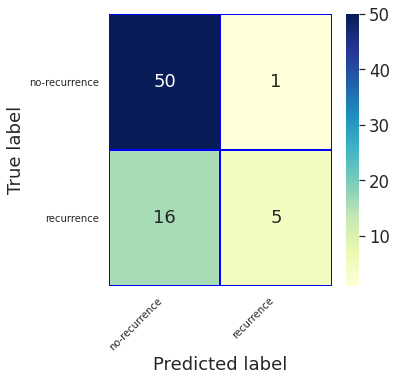

In [35]:
# SVM (Support Vertor Machines) Classification Model
from sklearn import svm

def fit_and_results(model):
  model.fit(X_train_enc, y_train_enc)

  # make predictions
  expected = y_test_enc
  predicted = model.predict(X_test_enc)

  # summarize the fit of the model
  print(metrics.classification_report(expected, predicted))
  print(metrics.confusion_matrix(expected, predicted))
  cm = metrics.confusion_matrix(expected, predicted)
  plot_cm(cm)

from sklearn import svm

fit_and_results(svm.SVC())

# SVM model is interesting. At first sight it offers higher precision on 1
# However its number of recalls on 1 is very high as well
# Using this model we would miss a lot of recurrence-events (i.e. we would identify patient as a cancer-free, when in reality patient has cancer)

In [39]:
# Using Lasso LogisticRegressionCV model

from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LogisticRegressionCV

lasso_regressor = LogisticRegressionCV(penalty='l2')
lasso_regressor.fit(X_train_enc,y_train_enc)
y_predict = lasso_regressor.predict(X_test_enc)
regression_model_mse = mean_squared_error(y_predict, y_test_enc)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test_enc))

lasso_regressor.coef_

# Lasso Logistic Regression CV can be used for classification
# Logistic regression, despite its name, is a linear model for classification rather than regression. 
# https://scikit-learn.org/stable/modules/linear_model.html#lasso
# We would use Lasso Logistic Regression to see what predictors were used
# We can also use lasso_regressor.coefs_paths_

array([[-0.07642332,  0.27689638,  0.01760545, -0.16118119,  0.16756167,
        -0.22448706, -0.16865593, -0.0581126 ,  0.22674047, -0.1620217 ,
        -0.61132093, -0.13272582,  0.30326544,  0.10519641,  0.31585052,
         0.05077626, -0.08555733, -0.02564277, -0.11174586,  0.35389772,
        -0.3343951 ,  0.07124744, -0.02788786,  0.01939741,  0.26609993,
         0.00551011, -0.26793963, -0.15260675,  0.42051831, -0.24456327,
        -0.31308247,  0.55761768,  0.1310274 , -0.13105546,  0.22737551,
        -0.48917401,  0.20298126, -0.08230999, -0.23761413,  0.3787133 ,
        -0.23836625,  0.23833818]])

In [40]:
# As the next step we will look for model's accuracy using neural networks
# For that we will use one hot encoding on the breast cancer categorical dataset and model it with a neural network
# A one hot encoding is appropriate for categorical data where no relationship exists between categories
# For class variable we will use Label Encoder
# The code is not mine, I copied it from the tuturials below and applied it to this case
# https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/


from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = pd.read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	# reshape target to be a 2d array
	y = y.reshape((len(y), 1))
	return X, y

# prepare input data
# OneHotEncoder encodes the input categorical data
def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder(handle_unknown='ignore')
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
# LabelEnconder encodes the target variable
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# load the dataset
X, y = load_dataset('/content/breast-cancer.data')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# define the  model

# We can now define a neural network model.

# We will use a MultiLayer Perceptron (MLP) neural network 
# with one hidden layer with 10 nodes, 
# and one node in the output layer for making binary classifications.

model = Sequential()
model.add(Dense(10, input_dim=X_train_enc.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=100, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
14/14 - 14s - loss: 0.7905 - accuracy: 0.4346
Epoch 2/100
14/14 - 0s - loss: 0.7075 - accuracy: 0.5280
Epoch 3/100
14/14 - 0s - loss: 0.6504 - accuracy: 0.6308
Epoch 4/100
14/14 - 0s - loss: 0.6064 - accuracy: 0.7103
Epoch 5/100
14/14 - 0s - loss: 0.5752 - accuracy: 0.7336
Epoch 6/100
14/14 - 0s - loss: 0.5538 - accuracy: 0.7710
Epoch 7/100
14/14 - 0s - loss: 0.5324 - accuracy: 0.7850
Epoch 8/100
14/14 - 0s - loss: 0.5190 - accuracy: 0.7897
Epoch 9/100
14/14 - 0s - loss: 0.5078 - accuracy: 0.7850
Epoch 10/100
14/14 - 0s - loss: 0.4989 - accuracy: 0.7804
Epoch 11/100
14/14 - 0s - loss: 0.4918 - accuracy: 0.7804
Epoch 12/100
14/14 - 0s - loss: 0.4851 - accuracy: 0.7804
Epoch 13/100
14/14 - 0s - loss: 0.4800 - accuracy: 0.7804
Epoch 14/100
14/14 - 0s - loss: 0.4745 - accuracy: 0.7850
Epoch 15/100
14/14 - 0s - loss: 0.4695 - accuracy: 0.7850
Epoch 16/100
14/14 - 0s - loss: 0.4650 - accuracy: 0.7850
Epoch 17/100
14/14 - 0s - loss: 0.4602 - accuracy: 0.7850
Epoch 18/100
14/14 - 0

In [41]:
print('Accuracy: %.2f' % (accuracy*100))

# In this case, we can see that the model achieved an accuracy of about 75-80% on the test dataset.
# accuracy will vary every time

Accuracy: 77.78


In [45]:
# GLM model

import statsmodels.api as sm 
import statsmodels.formula.api as sf

logit_res = sf.glm('classification ~ C(age) + C(tumorsize) + degmalig', data, family = sm.families.Binomial()).fit()

logit_res.summary()

# In this particular example I wanted to see what coef age, tumorsize and degmalig have

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         classification   No. Observations:                  286
Model:                            GLM   Df Residuals:                      269
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -151.70
Date:                Fri, 11 Jun 2021   Deviance:                       303.40
Time:                        15:10:03   Pearson chi2:                     269.
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -24.3326   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
C(age)[T.30-39]          21.2731   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
C(age)[T.40-49]          20.6702   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
C(age)[T.50-59]          20.4538   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
C(age)[T.60-69]          20.7716   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
C(age)[T.70-79]          20.7983   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
C(tumorsize)[T.10-14]    -1.0911      1.507     -0.724      0.469      -4.045       1.862
C(tumorsize)[T.15-19]     0.7347      1.192      0.617      0.538      -1.601       3.070
C(tumorsize)[T.20-24]     1.1014      1.146      0.961      0.336      -1.144       3.347
C(tumorsize)[T.25-29]     1.1520      1.145      1.006      0.314      -1.092       3.396
C(tumorsize)[T.30-34]     1.4240      1.139      1.250      0.211      -0.809       3.657
C(tumorsize)[T.35-39]     1.1094      1.218      0.911      0.362      -1.277       3.496
C(tumorsize)[T.40-44]     0.7738      1.207      0.641      0.521      -1.591       3.139
C(tumorsize)[T.45-49]     1.1709      1.712      0.684      0.494      -2.184       4.526
C(tumorsize)[T.5-9]     -19.3526    1.4e+04     -0.001      0.999   -2.74e+04    2.74e+04
C(tumorsize)[T.50-54]     1.5073      1.344      1.121      0.262      -1.128       4.142
degmalig                  0.8285      0.208      3.991      0.000       0.422       1.235
=========================================================================================
"""

In [46]:
# GLM Binominal Model

import statsmodels.api as sm

data = sm.datasets.cancer.load(as_pandas=False)
data.exog = sm.add_constant(data.exog)
binominal_model = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
binominal_results = binominal_model.fit()
print(binominal_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  301
Model:                            GLM   Df Residuals:                      299
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 11 Jun 2021   Deviance:                          nan
Time:                        15:10:45   Pearson chi2:                 5.56e+21
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.804e+17      5e+06  -1.36e+11      0.0

In [49]:
# Alternative way to write the same GLM binominal model

glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  301
Model:                            GLM   Df Residuals:                      299
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 11 Jun 2021   Deviance:                          nan
Time:                        15:12:17   Pearson chi2:                 5.56e+21
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.804e+17      5e+06  -1.36e+11      0.0

In [50]:
# We are going to import the dataset anew, to reset values to strings to use different encoders

data = pd.read_csv("/content/breast-cancer.data", header=None) #file contains no header info
print(f"Read in {len(data)} rows")
data.head()

Read in 286 rows


,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [51]:
# We will set column names

data.columns=['classification','age','menopause','tumorsize','invnodes','nodecaps','degmalig','breast','breastquad','irradiat']

In [52]:
# Check the data

data

,classification,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [53]:
# Replace "?" with "None"

data["breastquad"]=data['breastquad'].str.replace('?','None')
data["invnodes"]=data['invnodes'].str.replace('?','None')
data["breast"]=data['breast'].str.replace('?','None')

In [54]:
# Interpolate missing values with linear method

data.interpolate(method ='linear', limit_direction ='forward')

,classification,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [55]:
data.columns

Index(['classification', 'age', 'menopause', 'tumorsize', 'invnodes',
       'nodecaps', 'degmalig', 'breast', 'breastquad', 'irradiat'],
      dtype='object')

In [56]:
# OneHotEncoder Method 1
# We are transdoeming and fitting each column including "classification" column

from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()

classification_enc = enc.fit_transform(data[['classification']])

age_enc = enc.fit_transform(data[['age']])
tumorsize_enc = enc.fit_transform(data[['tumorsize']])
menopause_enc = enc.fit_transform(data[['menopause']])
invnodes_enc = enc.fit_transform(data[['invnodes']])
nodecaps_enc = enc.fit_transform(data[['nodecaps']])
degmalig_enc = enc.fit_transform(data[['degmalig']])
breast_enc = enc.fit_transform(data[['breast']])
breastquad_enc = enc.fit_transform(data[['breastquad']])
irradiat_enc = enc.fit_transform(data[['irradiat']])

In [57]:
type(age_enc)

scipy.sparse.csr.csr_matrix

In [58]:
from scipy.sparse import hstack

hstack([classification_enc, age_enc, tumorsize_enc, menopause_enc, invnodes_enc, nodecaps_enc, degmalig_enc, breast_enc, breastquad_enc, irradiat_enc])


<286x45 sparse matrix of type '<class 'numpy.float64'>'
	with 2860 stored elements in COOrdinate format>

In [59]:
# OneHotEncoder Method 2: convert to dataframe

classification_data = pd.DataFrame.sparse.from_spmatrix(classification_enc)
age_data = pd.DataFrame.sparse.from_spmatrix(age_enc)
tumorsize_data = pd.DataFrame.sparse.from_spmatrix(tumorsize_enc)
menopause_data = pd.DataFrame.sparse.from_spmatrix(menopause_enc)
invnodes_data = pd.DataFrame.sparse.from_spmatrix(invnodes_enc)
nodecaps_data = pd.DataFrame.sparse.from_spmatrix(nodecaps_enc)
degmalig_data = pd.DataFrame.sparse.from_spmatrix(degmalig_enc)
breast_data = pd.DataFrame.sparse.from_spmatrix(breast_enc)
breastquad_data = pd.DataFrame.sparse.from_spmatrix(breastquad_enc)
irradiat_data = pd.DataFrame.sparse.from_spmatrix(irradiat_enc)

# Check the shape
classification_data.shape, age_data.shape, tumorsize_data.shape, menopause_data.shape, invnodes_data.shape, nodecaps_data.shape, degmalig_data.shape, breast_data.shape, breastquad_data.shape, irradiat_data.shape

((286, 2),
 (286, 6),
 (286, 11),
 (286, 3),
 (286, 7),
 (286, 3),
 (286, 3),
 (286, 2),
 (286, 6),
 (286, 2))

In [60]:
# Create "new_date" to visualize this encoded dataset

new_data=pd.concat([classification_data, age_data, tumorsize_data, menopause_data, invnodes_data, nodecaps_data, degmalig_data, breast_data, breastquad_data, irradiat_data], axis = 1)
new_data

,0,1,0,1,2,3,4,5,0,1,2,3,4,5,6,7,8,9,10,0,1,2,0,1,2,3,4,5,6,0,1,2,0,1,2,0,1,0,1,2,3,4,5,0,1
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
282,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
283,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
284,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [61]:
# OneHotEncoder third method

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=True)

data_enc=enc.fit_transform(data[['classification','age', 'menopause', 'tumorsize', 'invnodes',
       'nodecaps', 'degmalig', 'breast', 'breastquad', 'irradiat']])
data_enc

<286x45 sparse matrix of type '<class 'numpy.float64'>'
	with 2860 stored elements in Compressed Sparse Row format>

In [62]:
enc.fit_transform(data[['classification','age', 'menopause', 'tumorsize', 'invnodes',
       'nodecaps', 'degmalig', 'breast', 'breastquad', 'irradiat']])

<286x45 sparse matrix of type '<class 'numpy.float64'>'
	with 2860 stored elements in Compressed Sparse Row format>

In [63]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
import numpy as np



ct = make_column_transformer(
    (ohe, ['age', 'menopause', 'tumorsize', 'invnodes',
       'nodecaps', 'degmalig', 'breast', 'breastquad', 'irradiat']),
     )
X = ct.fit_transform(data)
# notice that col1 is moved to the end because of the order in the column transformer.
pd.DataFrame.sparse.from_spmatrix(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
282,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
283,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
284,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [64]:
# The 3 OneHotEncoder examples above are not strickly the best since we are applying OneHotEncoder to "classification" as well
# It would be much better to apply LabelEncoder to "classification" to keep it in 1 colum with "0" and "1" values (instead of spliting it in 2 columns)

# Alternative method would be to assign "0" to no-recurrence-events and "1" to "recurrence-events"

# In this case we will use LabelEncoder
# The class for the normal state is assigned the class label 0 
# And the class with the abnormal state is assigned the class label 1
# We will use LabelEncoder to convert the class values to binary
# We can see the dataset and "classification" keeps being one column

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
data['classification'] = lb.fit_transform(data['classification'])
data

,classification,age,menopause,tumorsize,invnodes,nodecaps,degmalig,breast,breastquad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,1,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,1,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,1,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,1,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [66]:
Y = data[['classification']]
ct = make_column_transformer(
    (ohe, ['age', 'menopause', 'tumorsize', 'invnodes',
       'nodecaps', 'degmalig', 'breast', 'breastquad', 'irradiat']),
     )
X = ct.fit_transform(data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

# training error
y_train_predict = reg.predict(X_train)
regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
r2_score_tr=r2_score(y_train, y_train_predict)


# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
r2_score_ts=r2_score(y_test, y_predict)


# Using linear regression is not the correct model, I just wanted to try to see what happens and what slopes it will give me



intercept [0.35804611]
slope [[-2.38612339e-01  1.36745322e-01  4.89045042e-02  1.69032635e-02
   8.45869007e-02 -4.85276506e-02 -2.20062995e-02 -2.77383252e-02
   4.97446247e-02  5.44977747e-04 -1.38105322e-01 -1.97723067e-02
   1.01358681e-01  3.70085043e-02  6.87680513e-02  2.88253233e-02
  -3.57974887e-02 -7.05558023e-02 -1.67295254e-01  1.95020636e-01
  -9.57178893e-02  8.67842069e-02 -5.30286447e-02  0.00000000e+00
  -3.07142860e-02  1.03932289e-01 -1.12556756e-02 -1.72876696e-01
   2.09410831e-02  1.51935613e-01 -3.29721637e-02 -7.59536004e-02
   1.08925764e-01  2.51196089e-02 -2.51196089e-02  5.73815004e-01
  -2.55591677e-01 -4.95590680e-02 -1.16825880e-01 -1.84479400e-01
   3.26410207e-02 -5.47947119e-02  5.47947119e-02]]


In [68]:
# Using Lasso LogisticRegressionCV model

from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LogisticRegressionCV

lasso_regressor = LogisticRegressionCV(penalty='l2')
lasso_regressor.fit(X_train,y_train)
y_predict = lasso_regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))


# Lasso can be used for classification to get the coefficients

lasso_regressor.coef_

array([[-0.07642332,  0.27689638,  0.01760545, -0.16118119,  0.16756167,
        -0.22448706, -0.16865593, -0.0581126 ,  0.22674047, -0.1620217 ,
        -0.61132093, -0.13272582,  0.30326544,  0.10519641,  0.31585052,
         0.05077626, -0.08555733, -0.02564277, -0.11174586,  0.35389772,
        -0.3343951 ,  0.07124744, -0.02788786,  0.        ,  0.01939741,
         0.26609993,  0.00551011, -0.26793963, -0.15260675,  0.42051831,
        -0.24456327, -0.31308247,  0.55761768,  0.1310274 , -0.13105546,
         0.22737551, -0.48917401,  0.20298126, -0.08230999, -0.23761413,
         0.3787133 , -0.23836625,  0.23833818]])

**Conclusion**

After experimenting with different classfication models I would concluede that k-Nearest Neighbor Classification model is the most suitable in this scenario.
It has comparabily high accuracy at 0.81, high precision for 1 at 0.73 and the lowest recall for 1 at 0.51. The only model that might look better is SVM, with precision for 1 at 0.83.

The reason I decided that this is the best model out of the ones I used because I am giving more weight to 1 than to 0 outcome, and the lowest number of False Negatives is important to me. In cancer domain it is dangerous to classify recurrence-event (cancer) as a no-recurrence event, because we want to catch as many recurrence events as possible to save lives. In other models we have higher precision, however the number of False Negatives is also higher.

We also obtain good accuracy using NLP model, MPL. This model achieved an accuracy of about 75-80% on the test dataset. It is worth experimenting more and looking at other NLP powered models.